## Logistic Regression

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

## Model

In [2]:
diabetes = pd.read_csv('diabetes.csv')
df = diabetes.copy()

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [13]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

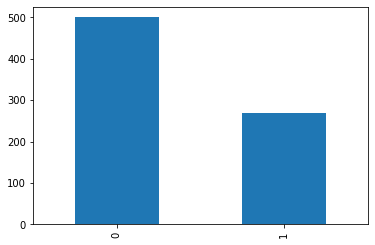

In [12]:
df['Outcome'].value_counts().plot.bar();

In [20]:
y = df['Outcome']
X = df.drop(['Outcome'], axis = 1)

In [25]:
log_model = sm.Logit(y, X).fit()
log_model.summary()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Thu, 16 Apr 2020   Pseudo R-squ.:                 0.05922
Time:                        21:30:59   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

In [26]:
#sk-learn

In [27]:
log_model = LogisticRegression(solver = 'liblinear').fit(X,y)
log_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
log_model.intercept_

array([-5.88848445])

In [29]:
log_model.coef_

array([[ 1.17086830e-01,  2.83748521e-02, -1.68971977e-02,
         7.45588118e-04, -6.42652274e-04,  5.97050348e-02,
         6.81461374e-01,  7.21476320e-03]])

## Predict & Model Tuning

In [31]:
y_pred = log_model.predict(X)

In [32]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [120, 148]])

In [36]:
(448 + 148) / (448 + 148 + 120 +52)

0.7760416666666666

In [37]:
accuracy_score(y,y_pred)

0.7760416666666666

In [38]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.78       768
   macro avg       0.76      0.72      0.74       768
weighted avg       0.77      0.78      0.77       768



In [39]:
log_model.predict(X)[0:5]

array([1, 0, 1, 0, 1])

In [44]:
log_model.predict_proba(X)[0:10, 0:1] # 0 probability

array([[0.35043775],
       [0.9169891 ],
       [0.22455276],
       [0.92139736],
       [0.16635686],
       [0.79900619],
       [0.88017597],
       [0.27815669],
       [0.32117452],
       [0.92268273]])

In [45]:
log_model.predict_proba(X)[0:10, 1:2] # 1 probability

array([[0.64956225],
       [0.0830109 ],
       [0.77544724],
       [0.07860264],
       [0.83364314],
       [0.20099381],
       [0.11982403],
       [0.72184331],
       [0.67882548],
       [0.07731727]])

In [49]:
y_probs = log_model.predict_proba(X)[:,1]
y_probs[0:10]

array([0.64956225, 0.0830109 , 0.77544724, 0.07860264, 0.83364314,
       0.20099381, 0.11982403, 0.72184331, 0.67882548, 0.07731727])

In [46]:
y[0:10] # real values

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [50]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs]

In [51]:
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [53]:
confusion_matrix(y,y_pred)

array([[448,  52],
       [120, 148]])

In [54]:
accuracy_score(y, y_pred)

0.7760416666666666

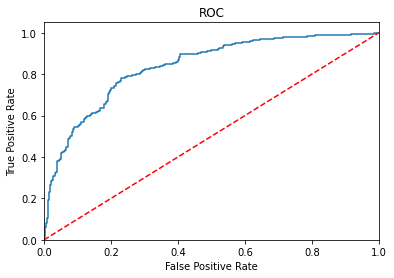

In [61]:
logit_roc_auc = roc_auc_score(y, log_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, y_probs)
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)


In [63]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
accuracy_score(y_test, loj_model.predict(X_test))

0.7575757575757576

In [65]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.7661231884057971

In [73]:
y_probs = loj_model.predict_proba(X_test)[:,1]

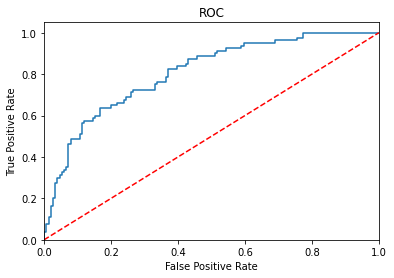

In [76]:
logit_roc_auc = roc_auc_score(y_test, loj_model.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()